<a href="https://colab.research.google.com/github/Manoj250/mnistCNN/blob/main/mnyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
(trainX, trainY), (testX, testY) = mnist.load_data()


In [ ]:
print(len(trainX),type(trainX),trainX.shape,trainX[0])

In [16]:
print(trainY[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


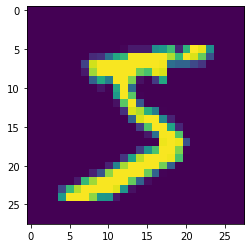

In [17]:
pyplot.imshow(trainX[0])

In [18]:
trainX = trainX.astype("float32")
testX = testX.astype("float32")
trainX = trainX/255.0
testX = testX/255.0

In [19]:
print(trainX[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [20]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)
print(trainX.shape,testX.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [22]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)
print(trainY[0:20])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [24]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
model.fit(trainX, trainY ,batch_size=100 ,epochs = 10 ,verbose=1,validation_data=(testX, testY))

Epoch 1/10
600/600 [==============================] - 25s 40ms/step - loss: 0.5697 - accuracy: 0.8264 - val_loss: 0.1453 - val_accuracy: 0.9571
Epoch 2/10
600/600 [==============================] - 24s 41ms/step - loss: 0.1257 - accuracy: 0.9608 - val_loss: 0.1131 - val_accuracy: 0.9646
Epoch 3/10
600/600 [==============================] - 25s 41ms/step - loss: 0.0902 - accuracy: 0.9720 - val_loss: 0.0876 - val_accuracy: 0.9725
Epoch 4/10
600/600 [==============================] - 25s 41ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.0677 - val_accuracy: 0.9787
Epoch 5/10
600/600 [==============================] - 25s 41ms/step - loss: 0.0621 - accuracy: 0.9804 - val_loss: 0.0556 - val_accuracy: 0.9827
Epoch 6/10
600/600 [==============================] - 24s 41ms/step - loss: 0.0521 - accuracy: 0.9833 - val_loss: 0.0678 - val_accuracy: 0.9781
Epoch 7/10
600/600 [==============================] - 24s 41ms/step - loss: 0.0469 - accuracy: 0.9849 - val_loss: 0.0523 - val_accuracy:

In [26]:
result = model.evaluate(testX, testY, batch_size=100)

100/100 [==============================] - 1s 14ms/step - loss: 0.0486 - accuracy: 0.9866


predicted value is 7


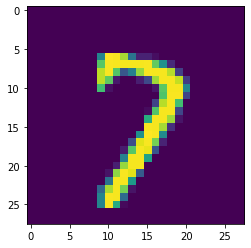

In [36]:
import random
pixels = testX[random.randint(0,len(testX)-1)]
pixels = np.expand_dims(pixels, axis=0)
pyplot.imshow(pixels.reshape(28,28))
prediction = model.predict(pixels)
index = np.argmax(prediction[0])
print("predicted value is "+str(index))